# 선형 회귀


훈련 세트에 맞는 직선의 방정식을 찾는 방법으로 최적의 기울기(coef_)와 절편(intercept_)를 구해야 함.

In [40]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()
lr.fit(train_input, train_target)

print("선형회귀모델의 50cm 농어의 무게 예측값: ", lr.predict([[50]]))


# 모델 파라미터:머신러닝 훈련과정 = 최적의 모데 ㄹ파라미터를 찾는 것
print("기울기(가중치):" ,lr.coef_)
print("절편: ", lr.intercept_)

선형회귀모델의 50cm 농어의 무게 예측값:  [1241.83860323]
기울기(가중치): [39.01714496]
절편:  -709.0186449535477


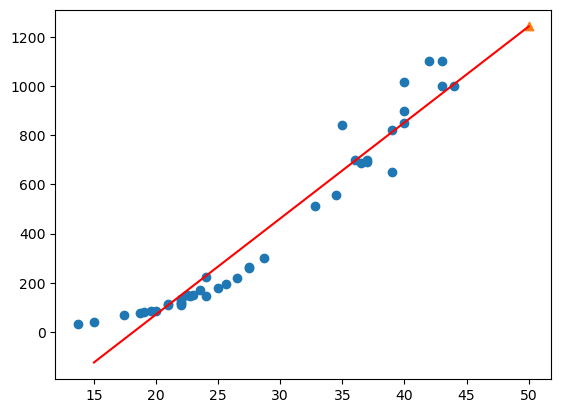

In [83]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15 *lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='r')

plt.scatter(50,1241.8, marker="^")
plt.show()

In [84]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


# 다항 회귀
 
 
target 값에 해당하는 weight는 음수가 될 수 없기 때문에 길이를 제곱한 값을 훈련세트에 추가하여 선형 회귀 모델을 다시 훈련

In [87]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [89]:
lr = LinearRegression()

lr.fit(train_poly, train_target)


# 50cm 농어의 무게 예측
lr.predict([[50**2,50]])

array([1573.98423528])

In [93]:
# 모델 파라미터
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


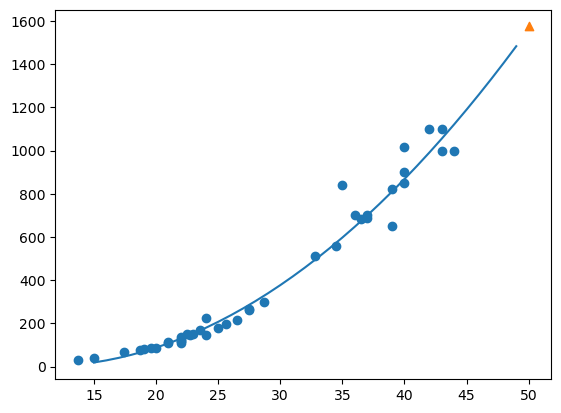

In [91]:
point = np.arange(15,50)

plt.scatter(train_input,train_target)
plt.plot(point, 1.01*point**2-21.6*point + 116.05)

plt.scatter([50],[1574],marker="^")
plt.show()

In [90]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


# 다항회귀와오버피팅/언더피팅 이해

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np




# 다항식으로 변환한 단항식 2X2 행렬 생성

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]


In [ ]:
# 2차 다항식 변환(degree =2) PolynomialFeatures 이용

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)

# 1은 기본 반환, 제곱, 곱을 반환

print('변환된 2차 다항식 계수 feature:\n', poly_ftr)
print("이렇게 변환된 피쳐는 선형 회귀에 적용해 다항 회귀를 구현한다.")

### 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성.

y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

In [ ]:
def polynomial_func(X):
    
    # y = 1+ 2x_1 + 3x_1^2 + 4x_2^3 구현
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0]) # x1의 값
    print(X[:, 1]) # x2의 값
    
    # y는 input x에 대한 값. target이 됨
    # 3차 다항식의 결정값
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
print("---------------------")
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

In [ ]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)

# 다항식 회귀에 들어가기 위해 3차식으로 합성된 feature들 
print('3차 다항식 계수 feature: \n',poly_ftr)

### 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [ ]:
### 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습

In [ ]:
# 3차 다항식 계수 feature와 3차 다항식 값으로 학습후 회귀 계수 확인

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

## 다항 회귀를 이용한 과소적합 및 과적합 이해


다항식 차수가 높아질수록 훈련 모델에 대해 모델이 과적합이 일어날 위험이 높아짐. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [ ]:
plt.scatter(X, y)

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

다음과 같이 차수가 높아질수록 노델이 데이테에 과하게 피팅됨. 과적합 문제가 발생. MSE는 작을수록 모델의 성능이 우수하다고 평가하는 지표임인데 차수가 높아질수록 훈련 데이터를 잘 반영하지만 MSE의 값이 커져 적합한 모델로 보기 어려움.

## 편향-분산 트레이드오프(bias-variance trade off)

* 위에 Degree =1인 모델은 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향있다. 이런 모델을 `고편향성`을 가졌다고 표현함(high bias)

* 반대로 Degree = 15인 모델은 매우 복잡한 모델로 높은 변동성을 가지게 되었음 이런 모델을 `고분산성`을 가졌다고 함(high variance)

* 일반적으로 편향과 분산은 한족이 높으면 한쪽이 낮아지는 경향이 있다.즉. 편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아짐(과적합)